# **Download Dataset From Kaggle to Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install -q kaggle

In [4]:
!mkdir -p ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d shayanfazeli/heartbeat

 85% 84.0M/98.8M [00:00<00:00, 161MB/s]
100% 98.8M/98.8M [00:00<00:00, 167MB/s]


In [8]:
from zipfile import ZipFile
file = 'heartbeat.zip'
with ZipFile(file, 'r') as zip:
  zip.extractall()
  print('Done')

Done


# **Import Libraries**

In [11]:
from keras import Sequential
from keras.layers import Conv1D , MaxPool1D , Flatten , Dense , Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# **Read Training Dataset**

In [ ]:
train_data = pd.read_csv('/content/mitbih_train.csv', header=None)

# **Data Preprocessing**

In [ ]:
train_data=pd.DataFrame(train_data)
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,0.052632,0.140351,0.119298,0.091228,0.140351,0.161404,0.105263,0.143860,0.143860,0.129825,0.147368,0.157895,0.164912,0.168421,0.154386,0.175439,0.164912,0.154386,0.182456,0.192982,0.196491,0.207018,0.217544,0.217544,0.256140,0.284211,0.294737,0.301754,0.301754,0.322807,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,0.078333,0.183333,0.275000,0.315000,0.361667,0.430000,0.481667,0.526667,0.543333,0.563333,0.581667,0.588333,0.600000,0.603333,0.613333,0.6216

In [ ]:
# Check if Data Contain Missing Value
train_data.isnull().values.any()

False

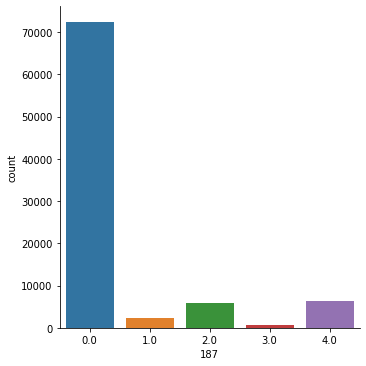

In [ ]:
# Data is not balanced due to class 0 contain 72471 sample
train_data[187].value_counts()
sns.catplot(x = 187, kind = 'count', data = train_data)

In [ ]:
# Balance the data
class_1 = train_data[train_data[187]==1]
class_2 = train_data[train_data[187]==2]
class_3 = train_data[train_data[187]==3]
class_4 = train_data[train_data[187]==4]
class_0 = train_data[train_data[187]==0].sample(n = 7000)
train_data = pd.concat([class_1, class_2, class_3, class_4, class_0]).sample(frac=1)

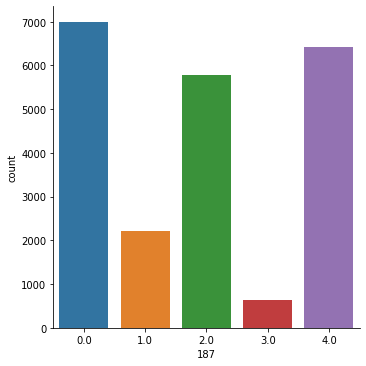

In [ ]:
train_data[187].value_counts()
sns.catplot(x = 187, kind = 'count', data = train_data)

# **Data Visualization**

In [ ]:
# Split training data to classes
df_1 = train_data[train_data[187] == 1] # Supraventricular ectopic beats
df_2 = train_data[train_data[187] == 2] # Ventricular ectopic beats
df_3 = train_data[train_data[187] == 3] # Fusion beats
df_4 = train_data[train_data[187] == 4] # Unknown Beats
df_5 = train_data[train_data[187] == 0] # Normal Beat

### **Normal Beat**

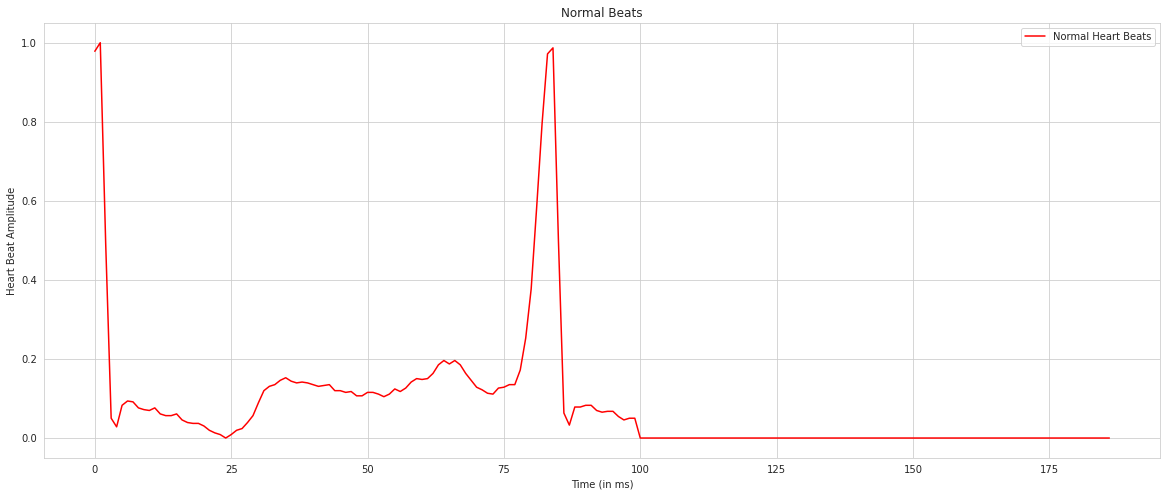

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(df_5.iloc[0, 0:187], color = 'red', label = 'Normal Heart Beats')
plt.title("Normal Beats", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

### **Supraventricular Ectopic Beat**

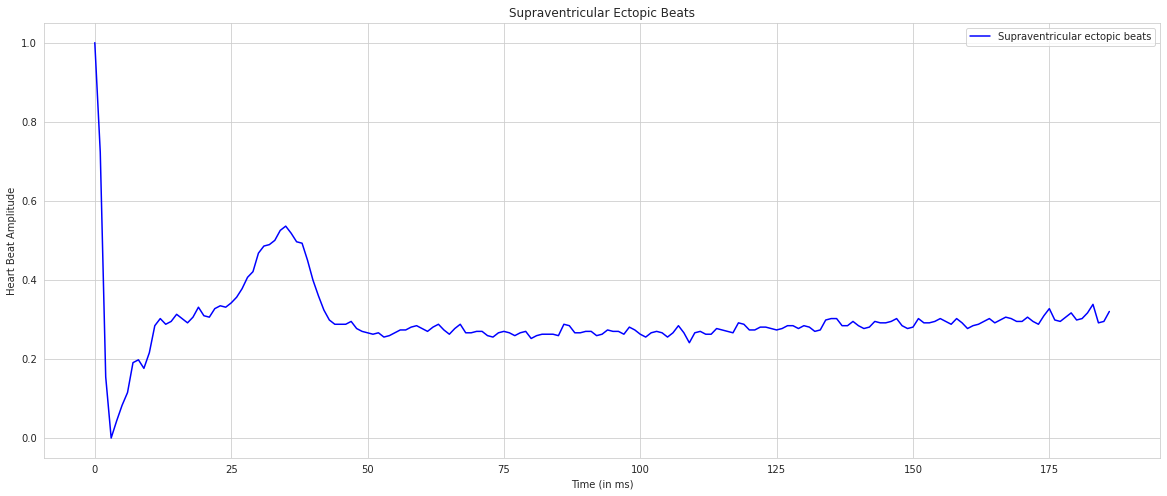

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(df_1.iloc[0, 0:187], color = 'blue', label = 'Supraventricular ectopic beats')
plt.title("Supraventricular Ectopic Beats", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

### **Ventricular Ectopic Beat**

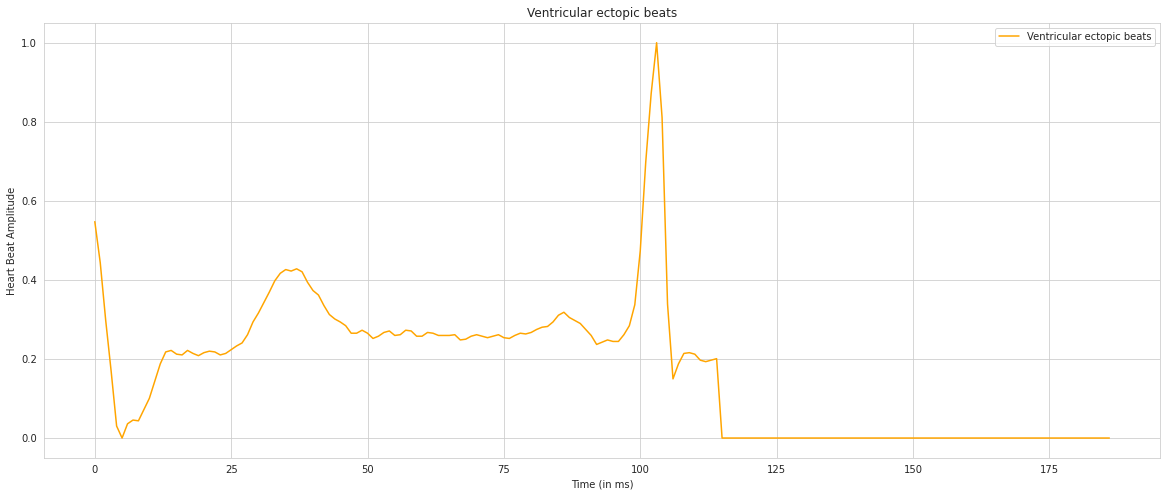

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(df_2.iloc[0, 0:187], color = 'orange', label = 'Ventricular ectopic beats')
plt.title("Ventricular ectopic beats", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

### **Fusion Beats**

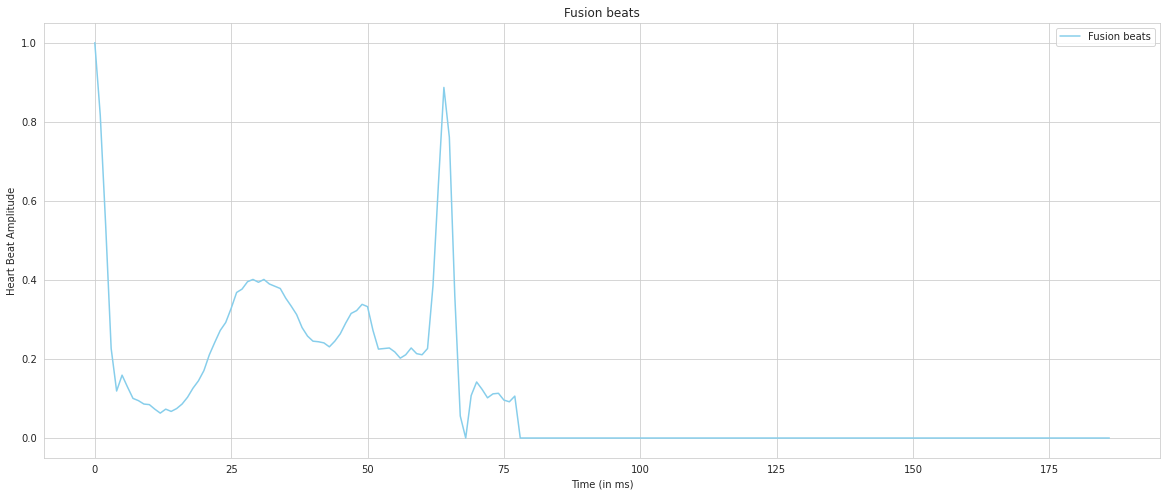

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(df_3.iloc[0, 0:187], color = 'skyblue', label = 'Fusion beats')
plt.title("Fusion beats", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

**Unknown Beats**

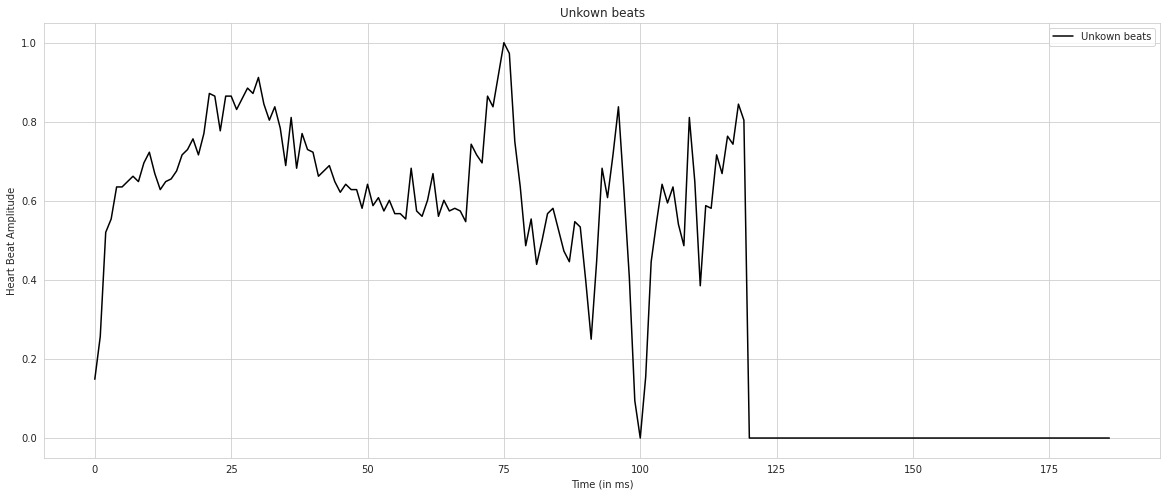

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(df_5.iloc[0, 0:187], color = 'black', label = 'Unkown beats')
plt.title("Unkown beats", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

# **Splitting Data into Input - Output**

In [ ]:
input_data = train_data.drop([187], axis=1) # Features
output_data = train_data[187] # Classes

# **Spliting Data into Train and validation**

In [ ]:
x_train, x_val , y_train, y_val= train_test_split(input_data, output_data, test_size = 0.1 , random_state = 1)

In [ ]:
x_train.shape

(19874, 187)

In [ ]:
# dimentionality should be 187 X 1 where 187 is number of features and 1 = 1D Dimentionality of data

x_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1)
x_val = np.array(x_val).reshape(x_val.shape[0], x_val.shape[1], 1)

print(x_train.shape)
print(x_val.shape)

(19874, 187, 1)
(2209, 187, 1)


# **Build CNN Architecture**

## **Architecture 1**

In [ ]:
model = Sequential()

model.add(Conv1D(filters=64 , kernel_size=(3,) , padding='same' , activation='relu' , input_shape=(x_train.shape[1],1)))

model.add(Conv1D(filters=32 , kernel_size=(3,) , padding='same' , activation='relu' ))

model.add(MaxPool1D(pool_size=(3,)))

model.add(Conv1D(filters=16 , kernel_size=(3,) , padding='same' , activation='relu' ))

model.add(MaxPool1D(pool_size=(3,)))

model.add(Dropout(0.5))

model.add(Flatten())  # input layer to fully connected layer

model.add(Dense(units=128 , activation='relu'))    # Hidden Layer
model.add(Dense(units=512 , activation='relu'))    # Hidden Layer

model.add(Dense(units=5 , activation='softmax'))    # Output Layer
model.load_weights("/content/drive/MyDrive/Colab Notebooks/saved-model/saved-model_1/best-model")
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' ,  metrics=(['accuracy']))

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'saved-model_1/best-model', monitor='val_loss', mode='min',
    save_weights_only=True, save_best_only=True, verbose=1
)


history = model.fit(x_train , y_train , epochs=25,validation_data=(x_val , y_val),callbacks=[checkpoint])

Epoch 1/25
622/622 [==============================] - 6s 7ms/step - loss: 0.8875 - accuracy: 0.6439 - val_loss: 0.3917 - val_accuracy: 0.8538

Epoch 00001: val_loss improved from inf to 0.39170, saving model to saved-model_1/best-model
Epoch 2/25
622/622 [==============================] - 4s 6ms/step - loss: 0.4238 - accuracy: 0.8512 - val_loss: 0.2996 - val_accuracy: 0.8904

Epoch 00002: val_loss improved from 0.39170 to 0.29959, saving model to saved-model_1/best-model
Epoch 3/25
622/622 [==============================] - 4s 6ms/step - loss: 0.3496 - accuracy: 0.8785 - val_loss: 0.2574 - val_accuracy: 0.9036

Epoch 00003: val_loss improved from 0.29959 to 0.25741, saving model to saved-model_1/best-model
Epoch 4/25
622/622 [==============================] - 4s 6ms/step - loss: 0.3124 - accuracy: 0.8890 - val_loss: 0.2454 - val_accuracy: 0.9135

Epoch 00004: val_loss improved from 0.25741 to 0.24538, saving model to saved-model_1/best-model
Epoch 5/25
622/622 [========================

## **Architecture 2**

In [ ]:
model2 = Sequential()

model2.add(Conv1D(filters=512 , kernel_size=(3,) , padding='same' , activation='relu' , input_shape=(x_train.shape[1],1)))

model2.add(Conv1D(filters=265 , kernel_size=(3,) , padding='same' , activation='relu' ))

model2.add(Conv1D(filters=128 , kernel_size=(3,) , padding='same' , activation='relu' ))

model2.add(Conv1D(filters=64 , kernel_size=(3,) , padding='same' , activation='relu' ))

model2.add(MaxPool1D(pool_size=(3,)))

model2.add(MaxPool1D(pool_size=(3,)))

model2.add(Dropout(0.7))

model2.add(Flatten())  # input layer to fully connected layer
model.load_weights("/content/drive/MyDrive/Colab Notebooks/saved-model/saved-model_2/best-model")

model2.add(Dense(units=512 , activation='relu'))    # Hidden Layer
model2.add(Dense(units=1024 , activation='relu'))    # Hidden Layer
model2.add(Dense(units=512 , activation='relu'))    # Hidden Layer

model2.add(Dense(units=5 , activation='softmax'))    # Output Layer


model2.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' ,  metrics=(['accuracy']))





Two checkpoint references resolved to different objects (<keras.layers.convolutional.Conv1D object at 0x7f40e04689d0> and <keras.layers.pooling.MaxPooling1D object at 0x7f40ed0b54d0>).

Two checkpoint references resolved to different objects (<keras.layers.core.Dense object at 0x7f40f71415d0> and <keras.layers.convolutional.Conv1D object at 0x7f40e04689d0>).


ValueError: ignored

## **Architecture 3**

In [ ]:
model3 = Sequential()

model3.add(Conv1D(filters=512 , kernel_size=(6,) ,strides=2, activation='relu' , input_shape=(x_train.shape[1],1)))
model3.add(MaxPool1D(pool_size=(6,)))


model3.add(Conv1D(filters=128 , kernel_size=(6,) , strides=2,activation='relu' ))
model3.add(MaxPool1D(pool_size=(3,)))

model3.add(Flatten())  # input layer to fully connected layer

model3.add(Dense(units=512 , activation='relu'))    # Hidden Layer
model3.add(Dense(units=512 , activation='relu'))
model3.add(Dense(units=5 , activation='softmax'))    # Output Layer

model3.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' ,  metrics=(['accuracy']))

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'saved-model_3/best-model', monitor='val_loss', mode='min',
    save_weights_only=True, save_best_only=True, verbose=1
)


history_3 = model3.fit(x_train , y_train , epochs=25,validation_data=(x_val , y_val),callbacks=[checkpoint])

Epoch 1/25
622/622 [==============================] - 7s 9ms/step - loss: 0.7945 - accuracy: 0.6882 - val_loss: 0.3881 - val_accuracy: 0.8529

Epoch 00001: val_loss improved from inf to 0.38815, saving model to saved-model_3/best-model
Epoch 2/25
622/622 [==============================] - 5s 8ms/step - loss: 0.2995 - accuracy: 0.8985 - val_loss: 0.2599 - val_accuracy: 0.9108

Epoch 00002: val_loss improved from 0.38815 to 0.25989, saving model to saved-model_3/best-model
Epoch 3/25
622/622 [==============================] - 5s 8ms/step - loss: 0.2455 - accuracy: 0.9181 - val_loss: 0.2356 - val_accuracy: 0.9185

Epoch 00003: val_loss improved from 0.25989 to 0.23560, saving model to saved-model_3/best-model
Epoch 4/25
622/622 [==============================] - 5s 8ms/step - loss: 0.2122 - accuracy: 0.9290 - val_loss: 0.2196 - val_accuracy: 0.9244

Epoch 00004: val_loss improved from 0.23560 to 0.21964, saving model to saved-model_3/best-model
Epoch 5/25
622/622 [========================

## **CNN Results Graph**

## **Accuracy**

In [ ]:
# Training and Validation Result For 3 CNN

pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Architecture 1")

pd.DataFrame(history_2.history)
pd.DataFrame(history_2.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Architecture 2")

pd.DataFrame(history_3.history)
pd.DataFrame(history_3.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Architecture 3")

NameError: ignored

## **Loss**

Text(0.5, 1.0, 'Architecture 3')

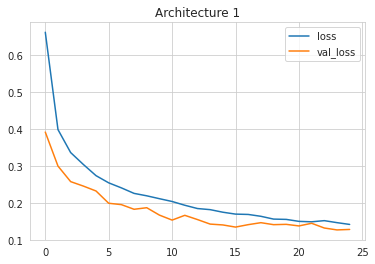

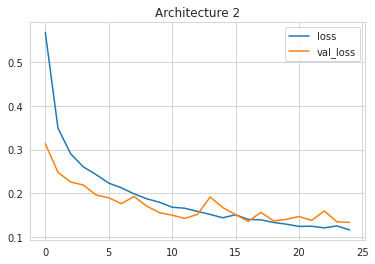

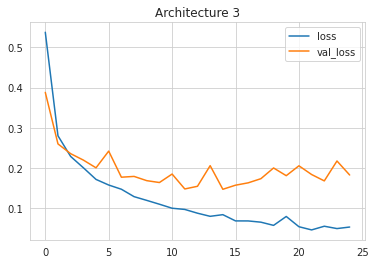

In [ ]:
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title("Architecture 1")

pd.DataFrame(history_2.history)
pd.DataFrame(history_2.history)[['loss', 'val_loss']].plot()
plt.title("Architecture 2")


pd.DataFrame(history_3.history)
pd.DataFrame(history_3.history)[['loss', 'val_loss']].plot()
plt.title("Architecture 3")

# **Test the Model**

## Read Test Data

In [ ]:
test = pd.read_csv("/content/mitbih_test.csv", header=None)
test=pd.DataFrame(test)
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,0.030992,0.028926,0.035124,0.026860,0.039256,0.035124,0.043388,0.047521,0.053719,0.053719,0.070248,0.072314,0.084711,0.097107,0.121901,0.132231,0.169421,0.196281,0.214876,0.235537,0.254132,0.264463,0.285124,0.272727,0.266529,0.239669,0.214876,0.173554,0.157025,0.123967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,0.304029,0.336996,0.377289,0.391941,0.439560,0.446886,0.457875,0.479853,0.512821,0.534799,0.586081,0.586081,0.604396,0.633700,0.615385,0.582418,0.564103,0.520147,0.490842,0.490842,0.468864,0.454212,0.450549,0.465201,0.450549,0.432234,0.424908,0.410256,0.391941,0.369963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,0.106195,0.141593,0.128319,0.150442,0.132743,0.150442,0.132743,0.150442,0.123894,0.163717,0.137168,0.141593,0.132743,0.150442,0.128319,0.146018,0.119469,0.123894,0.101770,0.092920,0.070796,0.079646,0.066372,0.070796,0.079646,0.092920,0.088496,0.084071,0.079646,0.088496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,0.102083,0.122917,0.150000,0.168750,0.172917,0.170833,0.168750,0.164583,0.156250,0.152083,0.147917,0.147917,0.145833,0.145833,0.141667,0.141667,0.147917,0.158333,0.168750,0.179167,0.191667,0.206250,0.220833,0.239583,0.258333,0.275000,0.287500,0.308333,0.320833,0.331250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,0.080537,0.104027,0.093960,0.117450,0.097315,0.134228,0.124161,0.161074,0.171141,0.194631,0.204698,0.261745,0.275168,0.332215,0.345638,0.395973,0.406040,0.456376,0.446309,0.446309,0.399329,0.369128,0.308725,0.295302,0.265101,0.271812,0.258389,0.268456,0.261745,0.281879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,0.075862,0.032184,0.000000,0.012644,0.119540,0.243678,0.310345,0.367816,0.412644,0.434483,0.502299,0.533333,0.563218,0.627586,0.671264,0.685057,0.679310,0.679310,0.677011,0.681609,0.690805,0.700000,0.713793,0.736782,0.752874,0.771264,0.783908,0.800000,0.806897,0.813793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,0.289985,0.376682,0.412556,0.452915,0.529148,0.582960,0.641256,0.662182,0.678625,0.684604,0.695067,0.699552,0.710015,0.704036,0.726457,0.7354

## Data is not Balanced

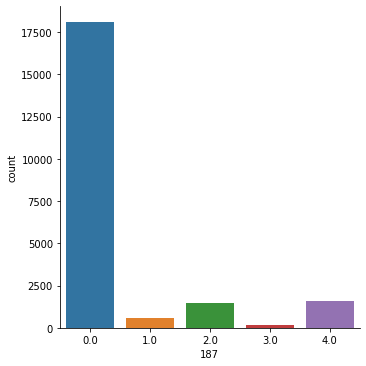

In [ ]:
test[187].value_counts()
sns.catplot(x = 187, kind = 'count', data = test)

## Balanced Data

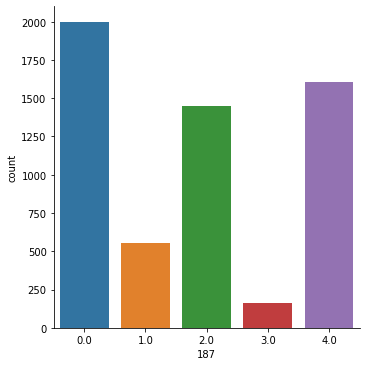

In [ ]:
class_1 = test[test[187]==1.0]
class_2 = test[test[187]==2.0]
class_3 = test[test[187]==3.0]
class_4 = test[test[187]==4.0]
class_0 = test[test[187]==0.0].sample(n = 2000)
test = pd.concat([class_1, class_2, class_3, class_4, class_0]).sample(frac=1)
sns.catplot(x = 187, kind = 'count', data = test)

## Data Predication

In [ ]:
x_test = test.drop([187], axis=1)
y_test = test[187]

x_test = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
ytest_pred1 = model.predict(x_test)
ytest_pred2 = model2.predict(x_test)
ytest_pred3 = model3.predict(x_test)

In [ ]:
ytest_pred1.shape

(5774, 5)

In [ ]:
y_test.shape

(5774,)

# **Results**

In [ ]:
print("------- Architecture 1 --------\n")
print(accuracy_score(np.argmax(ytest_pred1, axis=1), y_test))

------- Architecture 1 --------

0.9525458953931417


In [ ]:
print("------- Architecture 2 --------\n")
print(accuracy_score(np.argmax(ytest_pred2, axis=1), y_test))

------- Architecture 2 --------

0.9560096986491168


In [ ]:
print("------- Architecture 3 --------\n")
print(accuracy_score(np.argmax(ytest_pred3, axis=1), y_test))

------- Architecture 3 --------

0.9496016626255629


# **Best Architecture is 2**

## Confusion Matrix with Heat Map

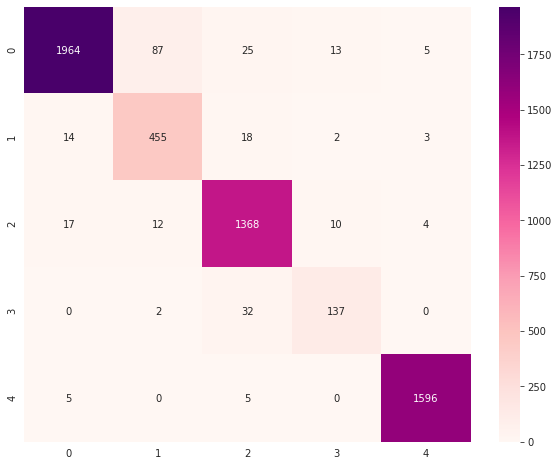

In [ ]:
confusion_matrix(np.argmax(ytest_pred2, axis = 1), y_test)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(np.argmax(ytest_pred2, axis =1), y_test), annot = True, fmt = '0.0f', cmap= 'RdPu')

## Normalized Confusion Matrix

Normalized confusion matrix


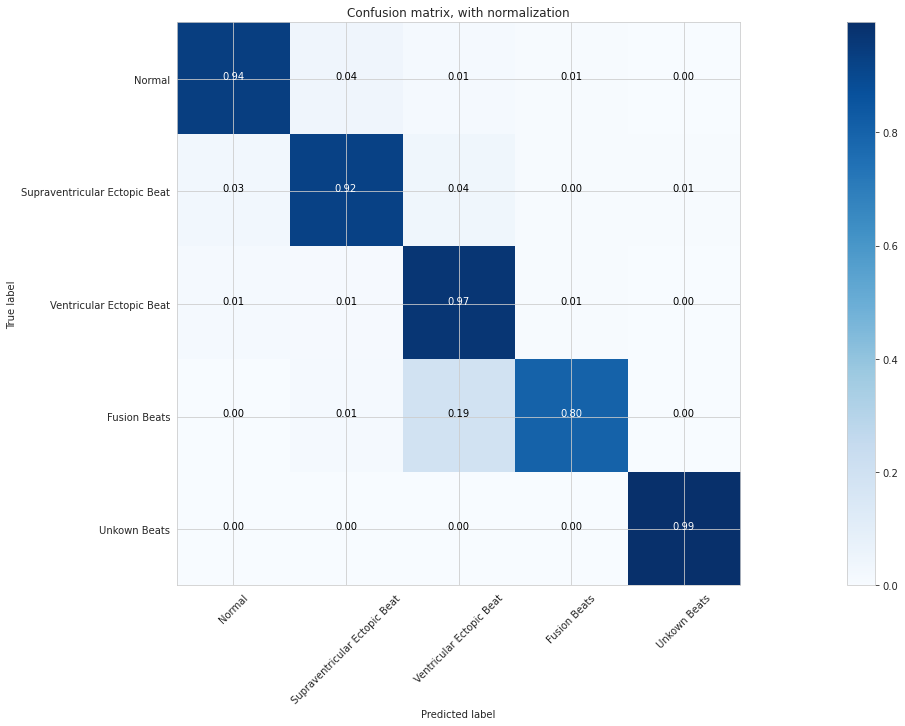

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(ytest_pred2.argmax(axis=1), y_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(30, 10))
plot_confusion_matrix(cnf_matrix, classes=['Normal', 'Supraventricular Ectopic Beat', 'Ventricular Ectopic Beat', 'Fusion Beats', 'Unkown Beats'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

# **Save Model**

In [ ]:
from keras.models import load_model

model2.save('model2.h5')

In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/saved-model/saved-model_1" -r "/content"